# Support Vector Machines 
## Fraud in wine Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

### The dataset is unbalanced

<AxesSubplot:xlabel='quality', ylabel='Count'>

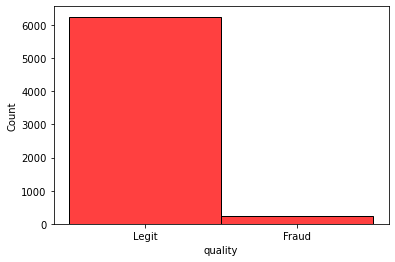

In [7]:
sns.histplot(data=df, x='quality', palette='Dark2',color='r')

### In general, instances that their type is white are greater in number.

<AxesSubplot:xlabel='quality', ylabel='count'>

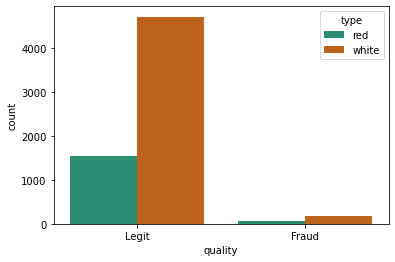

In [11]:
sns.countplot(data=df,x='quality',hue='type',palette='Dark2')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

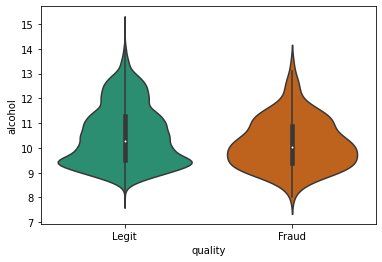

In [14]:
sns.violinplot(data=df,y='alcohol',x='quality',palette='Dark2')

In [24]:
X = df.drop('quality',axis = 1)
Y = df['quality']

In [25]:
X = pd.get_dummies(X)

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3)

In [29]:
ytrain.value_counts()

Legit    4388
Fraud     159
Name: quality, dtype: int64

In [30]:
ytest.value_counts()

Legit    1863
Fraud      87
Name: quality, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [39]:
from sklearn.svm import SVC
model1 = SVC(class_weight='balanced')
model2 = SVC()

In [40]:
model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)

SVC()

## The model with balanced classes performs better

In [46]:
from sklearn.metrics import classification_report
print('model with balanced class weights:')
print(classification_report(ytest,model1.predict(xtest)))
print('-------------------------------------------------------------------')
print('base model:')
print(classification_report(ytest,model2.predict(xtest)))

model with balanced class weights:
              precision    recall  f1-score   support

       Fraud       0.17      0.66      0.27        87
       Legit       0.98      0.85      0.91      1863

    accuracy                           0.84      1950
   macro avg       0.58      0.75      0.59      1950
weighted avg       0.95      0.84      0.88      1950

-------------------------------------------------------------------
base model:
              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        87
       Legit       0.96      1.00      0.98      1863

    accuracy                           0.96      1950
   macro avg       0.48      0.50      0.49      1950
weighted avg       0.91      0.96      0.93      1950



In [48]:
linear = SVC(kernel='linear',class_weight='balanced')
poly = SVC(kernel='poly',class_weight='balanced')
rbf = SVC(kernel='rbf',class_weight='balanced')
linear.fit(xtrain,ytrain)
poly.fit(xtrain,ytrain)
rbf.fit(xtrain,ytrain)

SVC(class_weight='balanced')

## Polynmial kernel performs the best

In [49]:
print('Model with Linear kernel:')
print(classification_report(ytest,linear.predict(xtest)))
print('-------------------------------------------------------------------')
print('Model with Polynomial kernel:')
print(classification_report(ytest,poly.predict(xtest)))
print('-------------------------------------------------------------------')
print('Model with Radial Basis Function kernel:')
print(classification_report(ytest,rbf.predict(xtest)))

Model with Linear kernel:
              precision    recall  f1-score   support

       Fraud       0.13      0.69      0.22        87
       Legit       0.98      0.79      0.87      1863

    accuracy                           0.78      1950
   macro avg       0.56      0.74      0.55      1950
weighted avg       0.94      0.78      0.84      1950

-------------------------------------------------------------------
Model with Polynomial kernel:
              precision    recall  f1-score   support

       Fraud       0.19      0.57      0.28        87
       Legit       0.98      0.88      0.93      1863

    accuracy                           0.87      1950
   macro avg       0.58      0.73      0.60      1950
weighted avg       0.94      0.87      0.90      1950

-------------------------------------------------------------------
Model with Radial Basis Function kernel:
              precision    recall  f1-score   support

       Fraud       0.17      0.66      0.27        87
    

In [51]:
from sklearn.metrics import accuracy_score
for i in range(1,15):
    model = SVC(kernel='poly',degree=i)
    model.fit(xtrain,ytrain)
    print('Polynomial kernel with degree = ',end='')
    print(i)
    print(accuracy_score(ytest,model.predict(xtest)))
    print('-----------------------------------')

Polynomial kernel with degree = 1
0.9553846153846154
-----------------------------------
Polynomial kernel with degree = 2
0.9553846153846154
-----------------------------------
Polynomial kernel with degree = 3
0.9574358974358974
-----------------------------------
Polynomial kernel with degree = 4
0.9553846153846154
-----------------------------------
Polynomial kernel with degree = 5
0.9517948717948718
-----------------------------------
Polynomial kernel with degree = 6
0.9533333333333334
-----------------------------------
Polynomial kernel with degree = 7
0.9543589743589743
-----------------------------------
Polynomial kernel with degree = 8
0.9538461538461539
-----------------------------------
Polynomial kernel with degree = 9
0.9523076923076923
-----------------------------------
Polynomial kernel with degree = 10
0.9497435897435897
-----------------------------------
Polynomial kernel with degree = 11
0.9471794871794872
-----------------------------------
Polynomial kernel w